# S18 - Part 1 - UNET

### UNET - Strided Convolution(Contracting Block) + Upsample(Expanding Block) + Dice Loss

In [1]:
!cd /kaggle/working

In [2]:
!rm -rf TSAI_ERA_Assignments
!git clone https://github.com/ToletiSri/TSAI_ERA_Assignments.git

Cloning into 'TSAI_ERA_Assignments'...
remote: Enumerating objects: 662, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 662 (delta 67), reused 77 (delta 32), pack-reused 512
Receiving objects: 100% (662/662), 18.23 MiB | 21.19 MiB/s, done.
Resolving deltas: 100% (343/343), done.


In [4]:
cd TSAI_ERA_Assignments/S18/Part1

[Errno 2] No such file or directory: 'TSAI_ERA_Assignments/S18/Part1'
/kaggle/working/TSAI_ERA_Assignments/S18/Part1


In [6]:
# Import dataset and fetch lightning data nodule
from dataset import OxfordIIITPetsCustomDataModule
datamodule = OxfordIIITPetsCustomDataModule(data_dir_train='data\\OxfordPets\\train', data_dir_test='data\\OxfordPets\\test', batch_size=8)

In [7]:
import pytorch_lightning as pl
from lightningModel import CustomUnet

pl.seed_everything(1234)
model_unet = CustomUnet(loss = 'DL', ContractMethod = 'StrConv', ExpandMethod = 'Up')
trainer = pl.Trainer( accelerator = 'gpu', max_epochs=30,  precision=16)
trainer.fit(model_unet, datamodule)

/opt/conda/lib/python3.10/site-packages/lightning_fabric/connector.py:554: UserWarning: 16 is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
  rank_zero_warn(
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/configuration_validator.py:69: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")


100%|██████████| 791918971/791918971 [00:25<00:00, 31131578.57it/s]


Extracting data\OxfordPets\train/oxford-iiit-pet/images.tar.gz to data\OxfordPets\train/oxford-iiit-pet


100%|██████████| 19173078/19173078 [00:01<00:00, 15952452.67it/s]


Extracting data\OxfordPets\train/oxford-iiit-pet/annotations.tar.gz to data\OxfordPets\train/oxford-iiit-pet


100%|██████████| 791918971/791918971 [00:25<00:00, 31497742.97it/s]


Extracting data\OxfordPets\test/oxford-iiit-pet/images.tar.gz to data\OxfordPets\test/oxford-iiit-pet


100%|██████████| 19173078/19173078 [00:01<00:00, 17300063.24it/s]


Extracting data\OxfordPets\test/oxford-iiit-pet/annotations.tar.gz to data\OxfordPets\test/oxford-iiit-pet


Training: 0it [00:00, ?it/s]

/kaggle/working/TSAI_ERA_Assignments/S18/Part1/loss.py:37: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred = nn.functional.softmax(pred)


Mean training loss at end of epoch 0 = 0.4008532062820766
Mean training loss at end of epoch 1 = 0.3363990712424983
Mean training loss at end of epoch 2 = 0.30245074439739833
Mean training loss at end of epoch 3 = 0.2805128473302592
Mean training loss at end of epoch 4 = 0.26502059667006783
Mean training loss at end of epoch 5 = 0.2529918150193449
Mean training loss at end of epoch 6 = 0.24341980602060045
Mean training loss at end of epoch 7 = 0.23537450899248538
Mean training loss at end of epoch 8 = 0.2288391884542318
Mean training loss at end of epoch 9 = 0.22294464742359907
Mean training loss at end of epoch 10 = 0.21764972347751438


/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/call.py:53: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


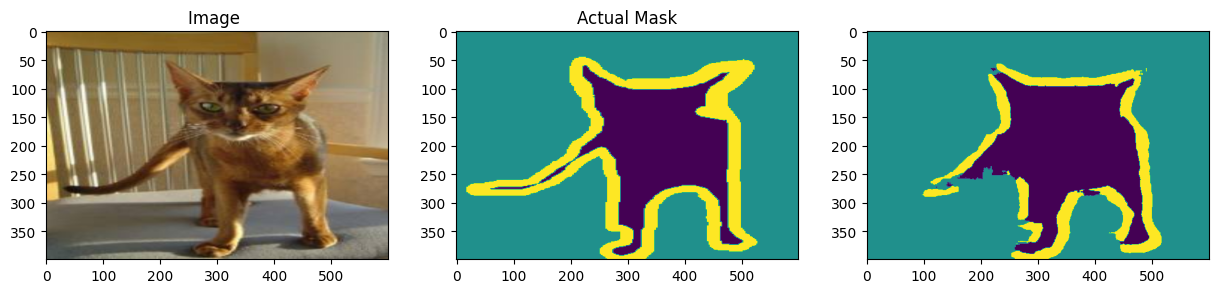

In [15]:
import matplotlib.pyplot  as plt
import numpy as np
import torch
import random

test_dl = datamodule.test_dataloader()
for batch in test_dl:
    images, masks = batch
    break  # Break to get the first batch (a batch of images and labels)

# Select one image and its corresponding label
index = 2#random.randint(0, 8)
image = images[index]
mask = masks[index]*255

with torch.no_grad():
    image_to_model = image.to("cuda").unsqueeze(0)
    pred_mask_prob = model_unet.model(image_to_model)

# From the probability of predictions for 3 classes, construct the actual prediction of values - 1,2,3
pred_mask = torch.argmax(pred_mask_prob, dim=1) + 1
pred_mask = pred_mask.squeeze().cpu()

mask = mask.squeeze()
img_np  = np.transpose(image.numpy(), (1, 2, 0))
fig, arr = plt.subplots(1, 3, figsize=(15, 15))
arr[0].imshow(img_np)
arr[0].set_title('Image ')
arr[1].imshow(mask)
arr[1].set_title('Actual Mask')
arr[2].imshow(pred_mask)